<p style="text-align: center;font-size: 24px;">Отчет по лабораторной работе №7<br>
по курсу «Численные методы»</p>

Студент группы М8О-406Б-19: Суханов Е.А.\
Преподаватель: Пивоваров Д.Е.\
Отчет сдан:\
Итоговая оценка:\
Подпись преподавателя:

---

##### 1. Тема работы

ЧИСЛЕННОЕ РЕШЕНИЕ УРАВНЕНИЙ ПАРАБОЛИЧЕСКОГО ТИПА. ПОНЯТИЕ О
МЕТОДЕ КОНЕЧНЫХ РАЗНОСТЕЙ. ОСНОВНЫЕ ОПРЕДЕЛЕНИЯ И
КОНЕЧНО-РАЗНОСТНЫЕ СХЕМЫ.

---

##### 2. Цель работы

**Задание**: Решить краевую задачу для дифференциального уравнения эллиптического типа. Аппроксимацию уравнения произвести с использованием центрально-разностной схемы. Для решения дискретного аналога применить следующие методы: метод простых итераций (метод Либмана), метод Зейделя, метод простых итераций с верхней релаксацией. Вычислить погрешность численного решения путем сравнения результатов с приведенным в задании аналитическим решением . Исследовать зависимость погрешности от сеточных параметров.

**Вариант**: 7

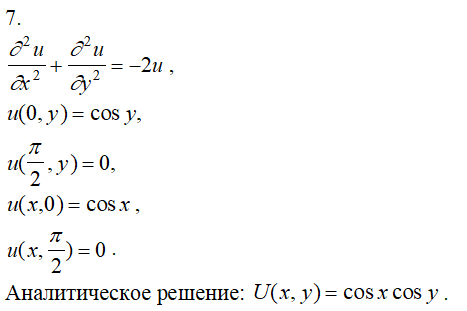

---

##### 3. Ход работы

In [2]:
# Импортируем нужные модули
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Описание задачи
class Task():
    def __init__(self, ux0, ux1, x0, x1 ,uy0, uy1, y0, y1, a):
        self.ux0 = ux0
        self.ux1 = ux1
        self.x0 = x0
        self.x1 = x1
        self.uy0 = uy0
        self.uy1 = uy1
        self.y0 = y0
        self.y1 = y1
        self.a = a
# Вариант 7
task = Task(
    ux0 = lambda y: np.cos(y),
    ux1 = lambda y: 0,
    x0 = 0,
    x1 = np.pi/2,
    uy0 = lambda x: np.cos(x),
    uy1 = lambda x: 0,
    y0 = 0,
    y1 = np.pi/2,
    a = -2,
)

analytic_func = lambda x,y: np.cos(x) * np.cos(y)

X_RES = 40
Y_RES = 40
X_0 = 0
X_1 = np.pi/2
Y_0 = 0
Y_1 = np.pi/2

In [4]:
# Аналитическое решение
def analytic(x_0, x_1, y_0, y_1, func, x_res, y_res):
    x = (x_1 - x_0) / (x_res-1)
    y = (y_1 - y_0) / (y_res-1)
    u = np.zeros(shape=(y_res, x_res))

    for j in range(0, y_res):
        _y = y_0 + j * y
        for i in range(0, x_res):
            _x = x_0 + i * x
            u[j][i] = func(_x, _y)
    
    return u

In [5]:
# Метод простых итераций
def libman(task: Task, x_res, y_res, max_itr = 1000, eps = 0.0001):
    x = (task.x1 - task.x0) / (x_res-1)
    y = (task.y1 - task.y0) / (y_res-1)
    u = np.zeros(shape=(y_res, x_res))

    for j in range(y_res):
        _y = task.y0 + j * y
        u[j][0] = task.ux0(_y)
        u[j][-1] = task.ux1(_y)
    for i in range(x_res):
        _x = task.x0 + i * x
        u[0][i] = task.uy0(_x)
        u[-1][i] = task.uy1(_x)

    for itr in range(max_itr):
        new_u = np.copy(u)
        for i in range(1,y_res-1):
            for j in range(1,x_res-1):
                new_u[i][j] = (u[i][j-1] + u[i][j+1] + u[i+1][j] + u[i-1][j])/(4-task.a*x*y)
        
        if np.max(np.abs(new_u - u)) < eps:
            return new_u, itr
        u = new_u

    return u, max_itr 

In [6]:
# Метод Зейделя
def seidel(task: Task, x_res, y_res, max_itr = 1000, eps = 0.0001):
    x = (task.x1 - task.x0) / (x_res-1)
    y = (task.y1 - task.y0) / (y_res-1)
    u = np.zeros(shape=(y_res, x_res))

    for j in range(y_res):
        _y = task.y0 + j * y
        u[j][0] = task.ux0(_y)
        u[j][-1] = task.ux1(_y)
    for i in range(x_res):
        _x = task.x0 + i * x
        u[0][i] = task.uy0(_x)
        u[-1][i] = task.uy1(_x)

    for itr in range(max_itr):
            new_u = np.copy(u)
            
            for i in range(1,y_res-1):
                for j in range(1,x_res-1):
                    new_u[i,j] = (new_u[i,j-1] + new_u[i,j+1] + new_u[i+1,j] + new_u[i-1,j])/(4-task.a*x*y)

            if np.max(np.abs(new_u - u)) < eps:
                return new_u, itr
            u = new_u
            
    return u, max_itr

In [7]:
# Метод простых итераций с верхней релаксацией
def libman_UR(task: Task, x_res, y_res, max_itr = 1000, eps = 0.0001, w = 1.8):
    x = (task.x1 - task.x0) / (x_res-1)
    y = (task.y1 - task.y0) / (y_res-1)
    u = np.zeros(shape=(y_res, x_res))

    for j in range(y_res):
        _y = task.y0 + j * y
        u[j][0] = task.ux0(_y)
        u[j][-1] = task.ux1(_y)
    for i in range(x_res):
        _x = task.x0 + i * x
        u[0][i] = task.uy0(_x)
        u[-1][i] = task.uy1(_x)

    for itr in range(max_itr):
        new_u = np.copy(u)
        for i in range(1,y_res-1):
            for j in range(1,x_res-1):
                new_u[i][j] = (new_u[i][j-1] + new_u[i][j+1] + new_u[i+1][j] + new_u[i-1][j])/(4-task.a*x*y)
                new_u[i,j] = (1 - w)*u[i][j] + w*new_u[i][j]
        
        if np.max(np.abs(new_u - u)) < eps:
            return new_u, itr
        u = new_u        
    
    return u, max_itr 

##### Сравнение методов

In [8]:
# Вывод графика ошибки
def draw_error(analytic, x0, x1, y0, y1, numericals, suffix_labels):
    y_res, x_res = analytic.shape
    x = (x1 - x0) / (x_res-1)
    y = (y1 - y0) / (y_res-1)
    x = np.arange(x0, x1+x/2, x)
    y = np.arange(y0, y1+y/2, y)

    for n,l in zip(numericals, suffix_labels):
        err = np.max(np.abs(analytic - n), axis=0)
        print(f"mean err {l}: {np.mean(err)}")
        plt.plot(x, err, label = f'Ошибка {l}')
    plt.legend(bbox_to_anchor = (1.05, 1), loc = 'upper left')
    plt.title('График изменения ошибки по координате x')
    plt.xlabel('t')
    plt.ylabel('error')
    plt.grid(True)
    plt.show()

    for n,l in zip(numericals, suffix_labels):
        err = np.max(np.abs(analytic - n), axis=1)
        print(f"mean err {l}: {np.mean(err)}")
        plt.plot(y, err, label = f'Ошибка {l}')
    plt.legend(bbox_to_anchor = (1.05, 1), loc = 'upper left')
    plt.title('График изменения ошибки по координате y')
    plt.xlabel('t')
    plt.ylabel('error')
    plt.grid(True)
    plt.show()

mean err libman: 0.19850509859279605
mean err seidel: 0.1913871468758281
mean err libman_UR: 0.18470047583232274


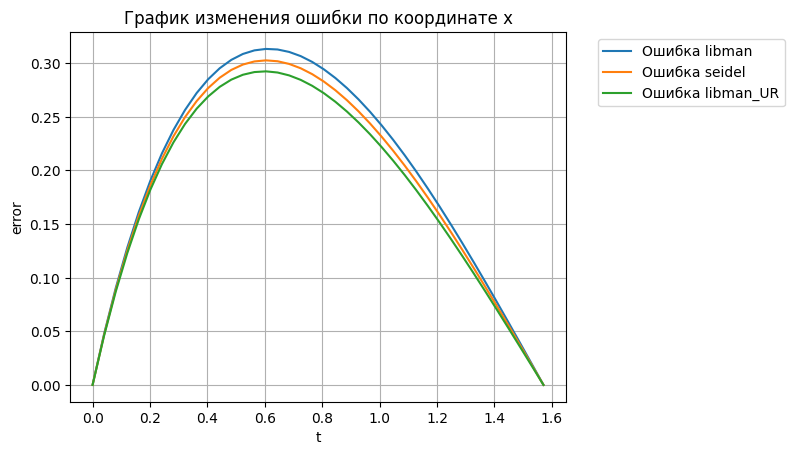

mean err libman: 0.19850509859279605
mean err seidel: 0.1913871468758281
mean err libman_UR: 0.1847004758323226


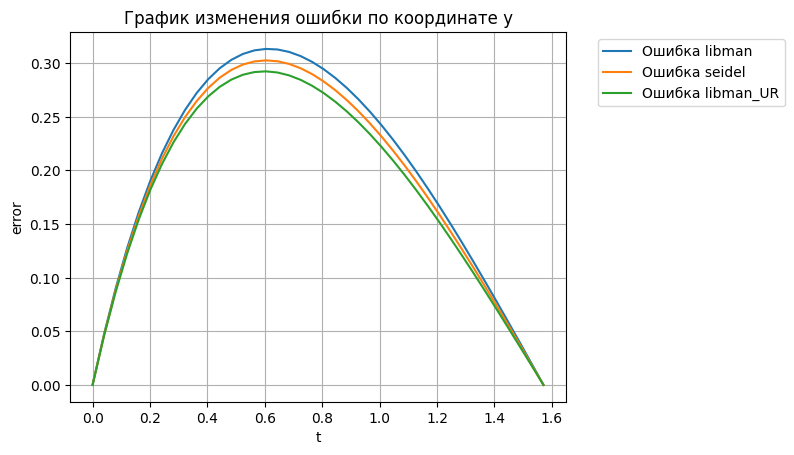

In [9]:
analytic_nodes = analytic(X_0, X_1, Y_0, Y_1, analytic_func, X_RES, Y_RES)
libman_nodes = libman(task, X_RES, Y_RES)
seidel_nodes = seidel(task, X_RES, Y_RES)
libman_UR_nodes = libman_UR(task, X_RES, Y_RES)
draw_error(analytic_nodes,  task.x0, task.x1, task.y0, task.x1,
        [libman_nodes[0], seidel_nodes[0], libman_UR_nodes[0]], ['libman', 'seidel', 'libman_UR'])

При этом, метод простой итерации с верхней релаксацией сошелся быстрее всего:

In [10]:
print("Количество итераций", 
    f"Метод простой итерации:\t\t\t\t{libman_nodes[1]}",
    f"Метод Зейделя:\t\t\t\t\t{seidel_nodes[1]}",
    f"Метод простой итерации c верхней релаксацией: \t{libman_UR_nodes[1]}", sep='\n')

Количество итераций
Метод простой итерации:				707
Метод Зейделя:					428
Метод простой итерации c верхней релаксацией: 	62


Узнаем зависимость количества итераций от параметра W в методе простой итерации с верхней релаксацией

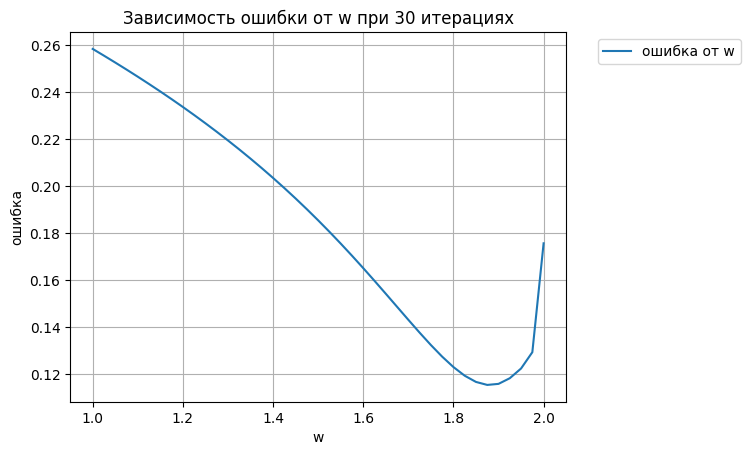

In [11]:
X_RES = 40
Y_RES = 40
MAX_ITR=30
STEP = 0.025
w_list = np.arange(1,2+STEP/2,STEP)
UR_v = []
analytic_nodes = analytic(X_0, X_1, Y_0, Y_1, analytic_func, X_RES, Y_RES)
for w in w_list:
    nodes, itrs = libman_UR(task, X_RES, Y_RES, w = w, max_itr=MAX_ITR, eps=0)
    UR_v.append(np.mean(np.abs(analytic_nodes - nodes)))

plt.plot(w_list, UR_v, label = 'ошибка от w')
plt.legend(bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.title(f'Зависимость ошибки от w при {MAX_ITR} итерациях')
plt.xlabel('w')
plt.ylabel('ошибка')
plt.grid(True)
plt.show()

##### Исследование зависиомсти погрешности от размера сетки

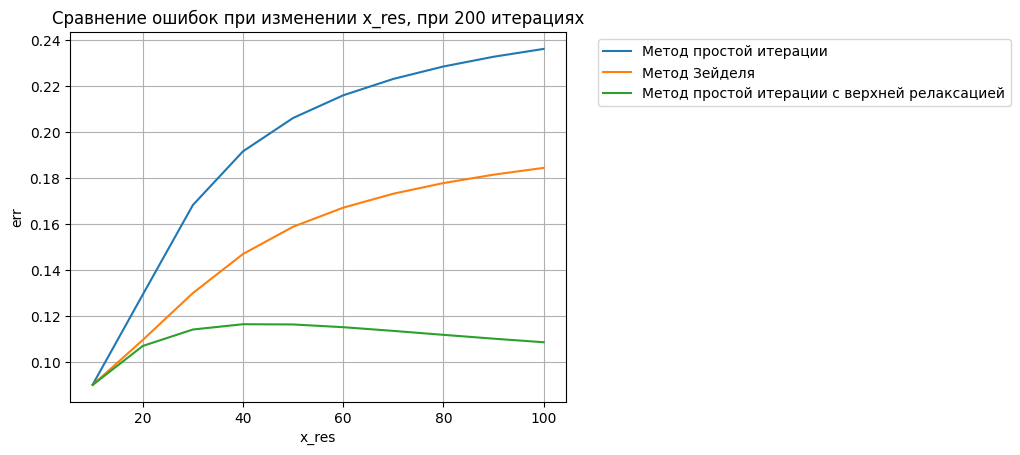

In [12]:
# Исследуем зависимость от X_RES при неизменном Y_RES
Y_RES = 40
X_RES_MIN = 10
X_RES_MAX = 100
X_RES_STEP = 10
MAX_ITR = 200
EPS = 0
W = 1.8

x_res_list = [x_res for x_res in range(X_RES_MIN, X_RES_MAX + X_RES_STEP // 2, X_RES_STEP)]

libman_v = []
seidel_v = []
libman_UR_v = []

for x_res in x_res_list:
    analytic_nodes = analytic(X_0, X_1, Y_0, Y_1, analytic_func, x_res, Y_RES)
    libman_nodes, libman_itr = libman(task, x_res, Y_RES, max_itr=MAX_ITR, eps=EPS)
    seidel_nodes, seidel_itr = seidel(task, x_res, Y_RES, max_itr=MAX_ITR, eps=EPS)
    libman_UR_nodes, libman_UR_itr = libman_UR(task, x_res, Y_RES, max_itr=MAX_ITR, eps=EPS, w=W)
    get_err = lambda nodes: (np.mean(np.abs(analytic_nodes - nodes)))
    libman_v.append(get_err(libman_nodes))
    seidel_v.append(get_err(seidel_nodes)) 
    libman_UR_v.append(get_err(libman_UR_nodes)) 


plt.plot(x_res_list, libman_v, label = 'Метод простой итерации')
plt.plot(x_res_list, seidel_v, label = 'Метод Зейделя')
plt.plot(x_res_list, libman_UR_v, label = 'Метод простой итерации с верхней релаксацией')
plt.legend(bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.title(f'Сравнение ошибок при изменении x_res, при {MAX_ITR} итерациях')
plt.xlabel('x_res')
plt.ylabel('err')
plt.grid(True)
plt.show()

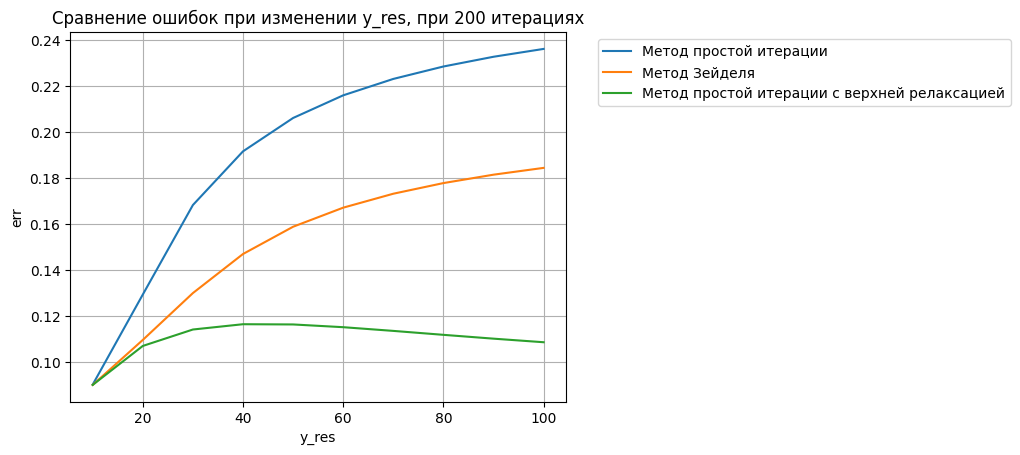

In [13]:
# Исследуем зависимость от Y_RES при неизменном X_RES
X_RES = 40
Y_RES_MIN = 10
Y_RES_MAX = 100
Y_RES_STEP = 10
MAX_ITR = 200
EPS = 0
W = 1.8

y_res_list = [y_res for y_res in range(Y_RES_MIN, Y_RES_MAX + Y_RES_STEP // 2, Y_RES_STEP)]

libman_v = []
seidel_v = []
libman_UR_v = []

for y_res in y_res_list:
    analytic_nodes = analytic(X_0, X_1, Y_0, Y_1, analytic_func, X_RES, y_res)
    libman_nodes, libman_itr = libman(task, X_RES, y_res, max_itr=MAX_ITR, eps=EPS)
    seidel_nodes, seidel_itr = seidel(task, X_RES, y_res, max_itr=MAX_ITR, eps=EPS)
    libman_UR_nodes, libman_UR_itr = libman_UR(task, X_RES, y_res, max_itr=MAX_ITR, eps=EPS, w=W)
    get_err = lambda nodes: (np.mean(np.abs(analytic_nodes - nodes)))
    libman_v.append(get_err(libman_nodes))
    seidel_v.append(get_err(seidel_nodes)) 
    libman_UR_v.append(get_err(libman_UR_nodes)) 


plt.plot(x_res_list, libman_v, label = 'Метод простой итерации')
plt.plot(x_res_list, seidel_v, label = 'Метод Зейделя')
plt.plot(x_res_list, libman_UR_v, label = 'Метод простой итерации с верхней релаксацией')
plt.legend(bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.title(f'Сравнение ошибок при изменении y_res, при {MAX_ITR} итерациях')
plt.xlabel('y_res')
plt.ylabel('err')
plt.grid(True)
plt.show()

---

##### 4. Выводы

Видно, что метод простой итерации с верхней релаксацией сходится быстрее всего.
При этом наблюдается минимум ошибки, после которого она начинает расти.

Метод Зейделя сходится лучше, чем метод простой итерации, но хуже, чем метод простой итерации с верхней релаксацией.

Метод простой итерации сходится хуже всего.

При увеличении размера сетки - ошибка растет, при неизменном количестве итераций.